<a href="https://colab.research.google.com/github/Adrieto/DataScience/blob/main/Ejercicios_para_Notebook_2_Parte_2_Enero_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicios para Notebook 2

Les dejamos unos ejercicios para poner en práctica lo que charlamos en el Notebook 2. Deben completa los espacios vacíos (marcados con guión bajo _____) con el código que haga falta para obtener un resultado.

- Importar un Dataset
- Plot de conteo, histogramas, kernel density estimation (KDE) y boxplots comparativos
- Introducción a la generación de números aleatorios

#Importar el dataset de vinos tintos y de vinos blancos

Importe los siguientes datasets, con los nombres corerspondientes utilizando la función pd.read
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv (df_red) and https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv" (df_white).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Complete los __ con los url
df_red = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    delimiter=";",
)
df_white = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
    delimiter=";",
)

Podemos contar cuántos datos hay en nuestro DataFrame para cada calidad. Visualice el código utilizado para los vinos tintos y repítalo para los blancos *sns.countplot* 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


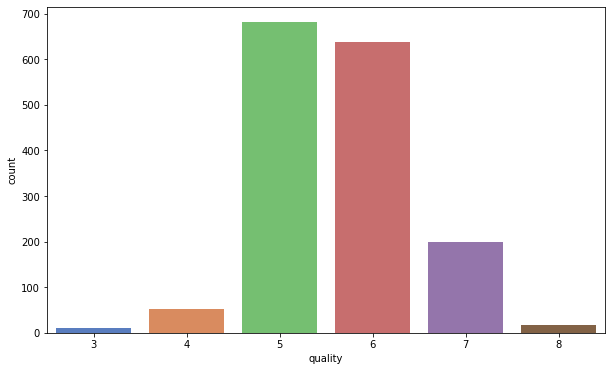

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(df_red["quality"], palette="muted");

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


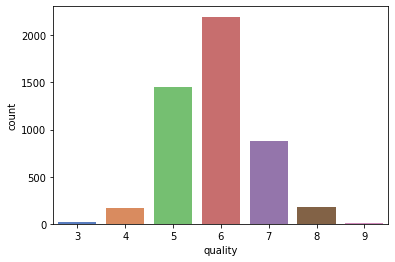

In [4]:
# Realícelo para vinos blancos
sns.countplot(df_white["quality"], palette="muted");

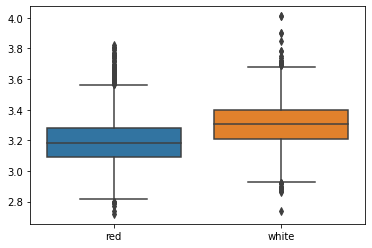

In [27]:
df_pH = pd.concat([df_white["pH"], df_red["pH"]], ignore_index=True, axis=1)
df_pH.columns = ["red", "white"]
sns.boxplot(data=df_pH);

Una buena forma de comparar los datos de una categoria es realizando boxplots paralelos.
Hacer un boxplot comparativo (usando **sns.boxplot**) entre vino tinto y blanco con las categorías "pH" y "alcohol".

TIP: No olvides utilizar **pd.concat** para tener los datos en un único DataFrame.

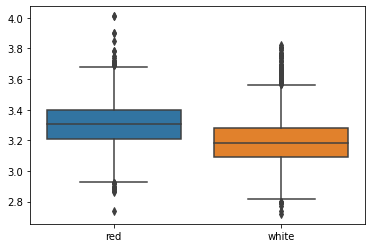

In [12]:
df_pH = pd.concat([df_red["pH"], df_white["pH"]], ignore_index=True, axis=1)
df_pH.columns = ["red", "white"]
sns.boxplot(data=df_pH)

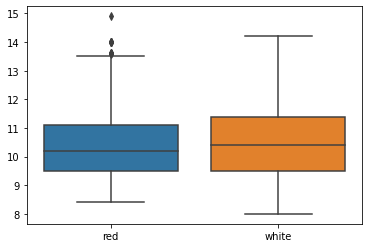

In [28]:
df_alc = pd.concat([df_red["alcohol"], df_white["alcohol"]], ignore_index=True, axis=1)
df_alc.columns = ["red", "white"]
sns.boxplot(data=df_alc)

##Intervalo de confianza

Calculamos el intervalo de confianza para la categoría alcohol. Ahora, lo calcularemos para la "Fixed acidity" de los vinos blancos (df2) cuya calidad sea 3.

In [33]:
import numpy as np

df_quality3_fixedacidity = df_white[df_white["quality"] == 3]["fixed acidity"]
mean = np.mean(df_quality3_fixedacidity)
N = np.size(df_quality3_fixedacidity)
SD = np.std(df_quality3_fixedacidity)  # Standard deviation
SE = SD / np.sqrt(N)  # Standard Error

print("mean: %.2f N: %.2f Standard Error: %.2f" % (mean, N, SE))
print(df_quality3_fixedacidity.head(25))

mean: 7.60 N: 20.00 Standard Error: 0.38
251      8.5
253      5.8
294      9.1
445      7.1
740      6.9
873     10.3
1034     7.9
1229     8.3
1417     8.6
1484     7.5
1688     6.7
1931     7.1
2050    11.8
2373     7.6
3087     6.1
3265     4.2
3307     9.4
3409     6.2
3810     6.8
4745     6.1
Name: fixed acidity, dtype: float64


Ahora calculemos los limites superior e inferior del intervalo

In [34]:
# La media se almacena en la varaible mean y el error estandar en la variable SE

lower_limit = mean - 1.96 * SE
upper_limit = mean + 1.96 * SE

print(
    "lower limit: \t%.2f \nmean: \t\t%.2f \nupper limit: \t%.2f"
    % (lower_limit, mean, upper_limit)
)

lower limit: 	6.86 
mean: 		7.60 
upper limit: 	8.34


Obtenemos la media del pH de ambos tipos de vinos

In [ ]:
print(df_pH.mean())

red      3.311113
white    3.188267
dtype: float64




---
#Ejercicios Avanzados / de Investigación


---







Queremos hacer histogramas de todas las categorías y mostrarlas como una matriz.
Complete el código parar repetir los histogramas de las categorias de vino blanco, utilizando color azul.


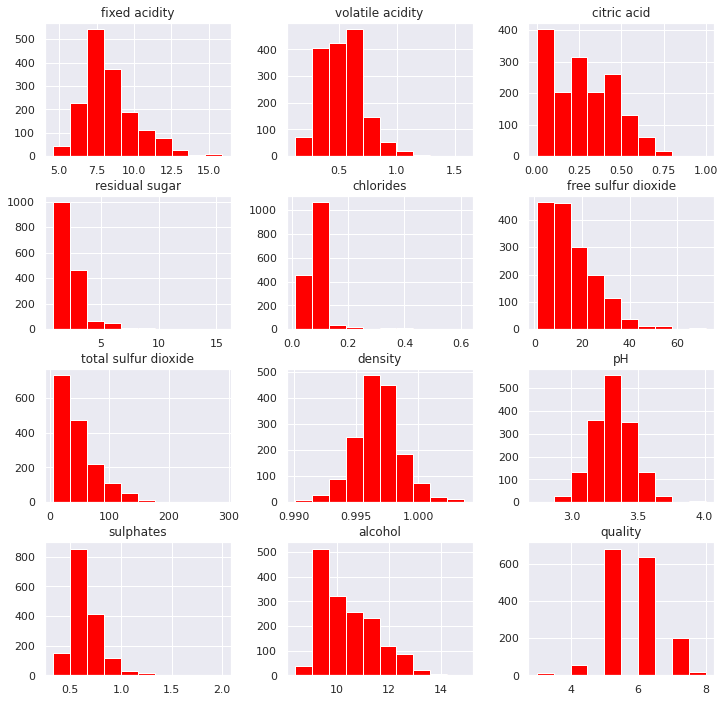

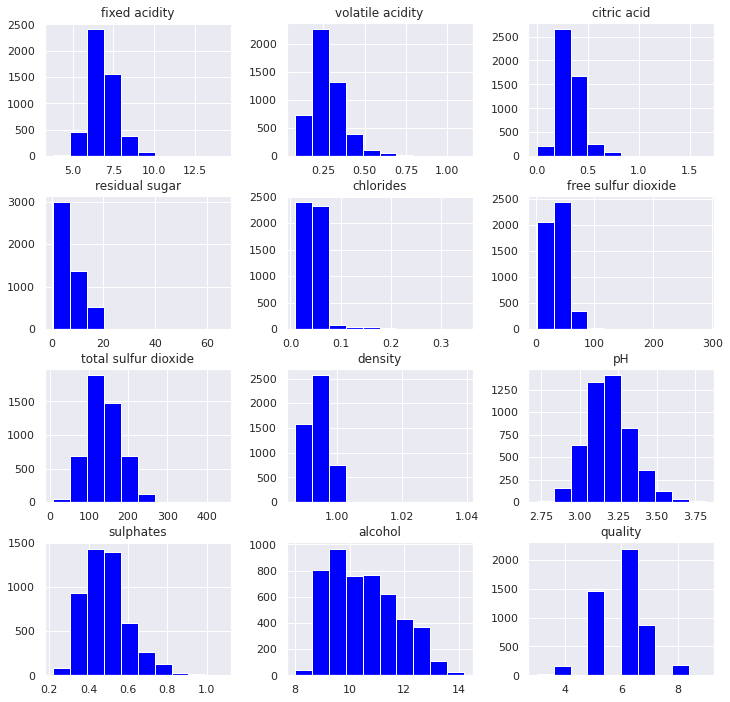

In [35]:
sns.set()
df_red.hist(figsize=(12, 12), color="red")
plt.show()

# Repetir para vino blanco en color azul
df_white.hist(figsize=(12, 12), color="blue")
plt.show()

Queremos ver el histograma de la variable "alcohol" con un grááfico de KDE. Los histogramas y la KDE pueden combinarse usando **sns.distplot(*dataset*.*category*, kde=true)**. Vea el ejemplo del vino tinto y repítalo con el vino blanco.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


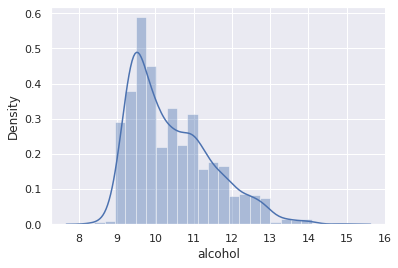

In [46]:
sns.distplot(df_red.alcohol, kde=True);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


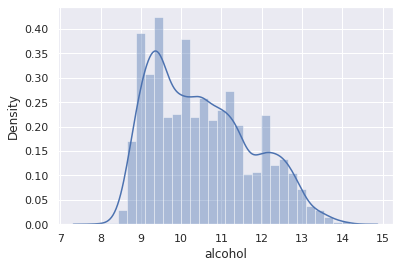

In [47]:
sns.distplot(df_white.alcohol, kde=True)

#Usar la función de generación de números aleatorios

El módulo **random** de las librerias estándar de Python incuyen un set de funciones que permiten obtener números aleatorios -o pseudo-aleatorios, para ser estrictos- de distintas distribuciones.

(Por qué son números pseudo-aleatorios y no aleatorios? https://pybonacci.org/2013/01/11/numeros-aleatorios-en-python-con-numpy-y-scipy/)





La función **np.random.randint (low, high = None, size = None, dtype = int)**
Devuelve números enteros desde *low* (inclusive) hasta *high* (no inclusive).

Si no especificamos el parametro *High*, los números se muestrean en el intervalo [0, low). 

Usen la funcióón mencionada para obtener un *array* de 10 elementos enteros muestreados aleatoriamente, que sean únicamente 0 o 1.

Obs: En Python se comienza a contar desde cero.

In [49]:
np.random.randint(low=2, size=10)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

obs: Cada vez que ejecutamos la celda los valores cambian, pero siempre respetan los parámetros requeridos (low, high, size)

Utilizando la misma función, obtener una matriz de 2x4 donde cada elemento sea un entero entre 0 y 4.
Help: to build a 2x4 matrix use size = (i, j), where i: row, j: column

In [50]:
np.random.randint(
    low=2, size=(2, 4)
)  # size=(2,4) aclara que la matriz tiene que ser de dos filas y cuatro columnas.

array([[1, 0, 1, 0],
       [1, 0, 1, 0]])

Otra función útil es **numpy.random.(nombre_de_distribución)** que genera números aleatorios de la distribución requerida.

Por ejemplo, con la función **np.random.poisson(lambda=None, size=None)**
 , podemos tener muestras obtenidas de una distribución Poisson. Los parámetros de la distribución suelen indicarse entre paréntesis.

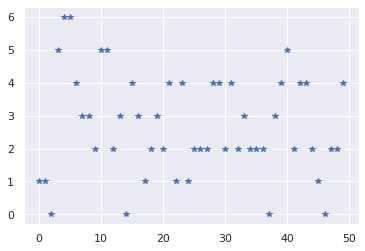

In [58]:
import matplotlib.pyplot as plt

y = np.random.poisson(2.5, (50))
x = range(0, 50)
plt.plot(x, y, "*")

Pruebe lo mismo utilizando la distribución binomial *numpy.random.binomial(n, p, size=None)* con n=10, p=0.5 y size=30


In [59]:
np.random.binomial(10, 0.5, 30)

array([4, 5, 4, 5, 3, 5, 6, 3, 4, 7, 6, 4, 8, 4, 3, 4, 4, 7, 6, 1, 2, 6,
       3, 5, 5, 2, 2, 4, 6, 4])

Utilizaremos la libreria matplotlib para graficar. La importaremos.

Crearemos un histograma con datos muestreados de una distribución normal **np.random.normal(mu,sigma,size)**. Utilicen un valor de media 0, sigma 0.2 y tamaño de muestra igual a 1000. 

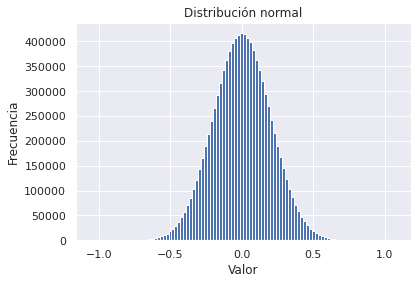

In [67]:
import matplotlib.pyplot as plt

# we generate the data
datos = np.random.normal(loc=0, scale=0.2, size=10_000_000)

# histogram of normal distribution
plt.hist(datos, 102)
plt.ylabel("Frecuencia")
plt.xlabel("Valor")
plt.title("Distribución normal")
plt.show()

Prueben haciéndolo con una distribución Poisson con parámetro lambda igual a 2.5.
Ayuda: Usar la función **np.random.poisson(lambda, size)**

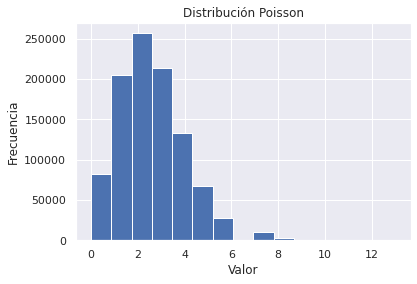

In [71]:
import matplotlib.pyplot as plt

# we generate the data
lambd = 2.5  # lambda parameter of Poisson distribution
size = 1_000_000  # amount of random numbers sampled from the distribution
datos = np.random.poisson(lambd, size)  # creating sample data

# histogram of poisson distribution sampled data
plt.hist(datos, 15)
plt.ylabel("Frecuencia")
plt.xlabel("Valor")
plt.title("Distribución Poisson")
plt.show()

#Ejercicio extra: Teorema central del Límite

Hagamos histogramas con muestras de tamaño 1000 provenientes de las distribuciones Binomial, Exponencial, Poisson y Geométrica. Utilicemos los parámetros _p_ = 0.9  y _n_ = 1 (binomial), _lambda_ = 1.0 (poisson), _scale_ = 2.0 (exponencial) y un _q_ = 0.5 (geometrica). 
Inténtelo nuevamente con muestras que van incrementando su tamaño entre 1 y 20000. Luego, grafiquen las medias en un histograma para cada tipo de distribución (les dejamos un código para completar). Para esto deberán usar un **ciclo for** (`for i in range(1,20000)`) y crear una lista para almacenar los valores de *mean* a medida que crece la muestra. Para armar una grilla de gráficos, utilicen el método _subplot_ de la libreria matplotlib.

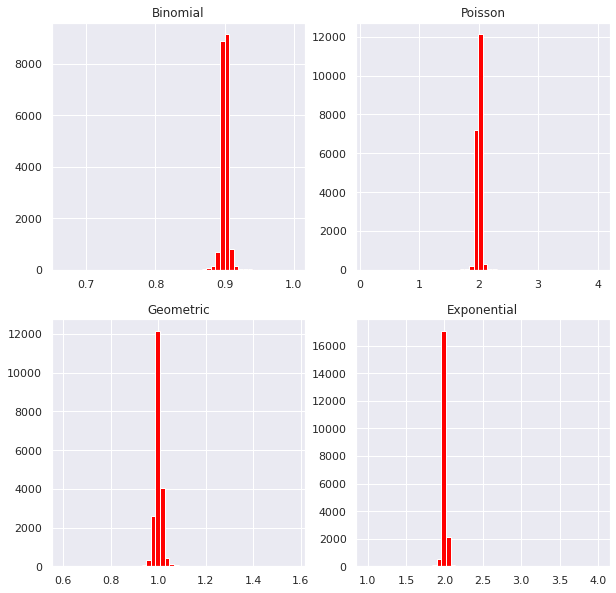

In [75]:
# Ejemplo teorema del límite central
import pandas as pd

muestra_binomial = []
muestra_exp = []
muestra_poisson = []
muestra_geometric = []
p = 0.9
lam = 1.0
size = 1000

# con esta linea comenzamos el ciclo. Para cada "vuelta" de ese ciclo, se
# repetirán todos los comandos que empiecen con la indentación o tabulación.
for i in range(1, 20000):
    muestra = np.random.binomial(1, p, size=i)
    muestra_binomial.append(muestra.mean())

    muestra = np.random.exponential(scale=2.0, size=i)
    muestra_exp.append(muestra.mean())

    muestra = np.random.geometric(p=0.5, size=i)
    muestra_geometric.append(muestra.mean())

    muestra = np.random.poisson(lam=lam, size=i)
    muestra_poisson.append(muestra.mean())

# en el siguiente comando armamos un DataFrame con los valores medios almacenados
# a lo largo de las iteraciones
df = pd.DataFrame(
    {
        "binomial": muestra_binomial,
        "poisson": muestra_poisson,
        "geometric": muestra_geometric,
        "exponential": muestra_exp,
    }
)

# a partir de este punto, armamos los gráficos para comparar.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
df.binomial.hist(ax=axes[0, 0], bins=50, color="red")
df.exponential.hist(ax=axes[0, 1], bins=50, color="red")
df.poisson.hist(ax=axes[1, 0], bins=50, color="red")
df.geometric.hist(ax=axes[1, 1], bins=50, color="red")

axes[0, 0].set_title("Binomial")
axes[0, 1].set_title("Poisson")
axes[1, 0].set_title("Geometric")
axes[1, 1].set_title("Exponential")
plt.show()